In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading data

In [2]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# pre-processing

In [ ]:
#handling missing values

In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

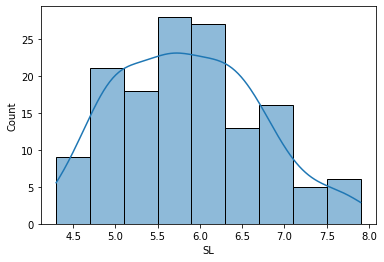

In [8]:
sns.histplot(data['SL'],kde=True)
plt.show()

In [9]:
data['SL']=data['SL'].fillna(data['SL'].median()) #sincce slightly skewed, we can fill with median value

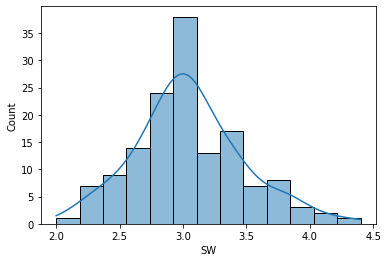

In [10]:
sns.histplot(data['SW'],kde=True)
plt.show()

In [11]:
data['SW']=data['SW'].fillna(data['SW'].mean()) # since it's normal distribution, we can fill with mean

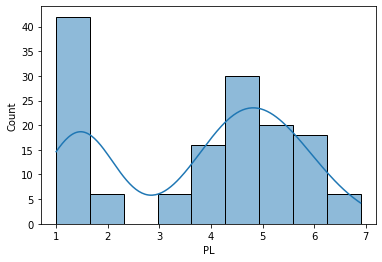

In [12]:
sns.histplot(data['PL'],kde=True)
plt.show()

In [13]:
data['PL']=data['PL'].interpolate() #filling values with interpolate function

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
#handling outliers

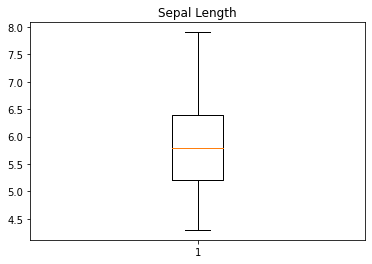

In [16]:
plt.boxplot(data['SL'])
plt.title('Sepal Length')
plt.show()

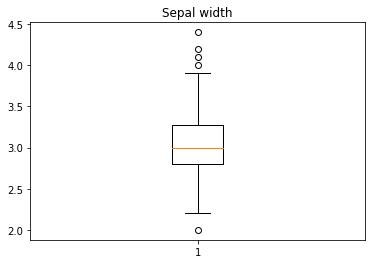

In [17]:
plt.boxplot(data['SW'])
plt.title('Sepal width')
plt.show()

In [18]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [19]:
IQR = Q3-Q1
IQR

0.4500000000000002

In [20]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print(lower_lim)
print(upper_lim)

2.1249999999999996
3.9250000000000003


In [22]:
outliers=[]
for i in data['SW']:
    if (i>upper_lim) or (i<lower_lim):
        outliers.append(i)
        
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [23]:
index=data['SW']>upper_lim
data.loc[index].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
index=data['SW']<lower_lim
data.loc[index].index

Int64Index([60], dtype='int64')

In [25]:
data.drop([14, 15, 32, 33,60],inplace=True)

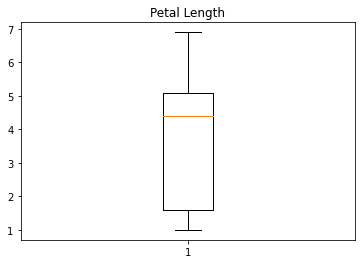

In [26]:
plt.boxplot(data['PL'])
plt.title('Petal Length')
plt.show()

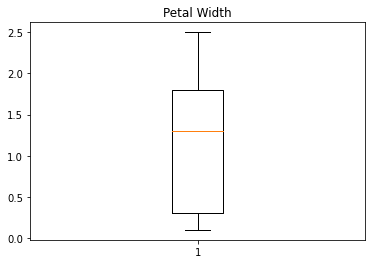

In [27]:
plt.boxplot(data['PW'])
plt.title('Petal Width')
plt.show()

# label encoding target column

In [28]:
data['Classification'].nunique()

3

In [29]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [30]:
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [31]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# building model

In [32]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [ ]:
#logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
confusion_matrix(y_test,y_pred_lr)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_lr)

0.9310344827586207

In [40]:
#kNN model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier= KNeighborsClassifier(n_neighbors=8)
classifier= classifier.fit(x_train,y_train)
y_pred_kNN = classifier.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred_kNN)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred_kNN)

0.896551724137931

In [45]:
#SVM model

In [46]:
from sklearn.svm import SVC

In [47]:
clf_svm =SVC(kernel='linear')
clf_svm =clf_svm.fit(x_train,y_train)
y_pred_svm=clf_svm.predict(x_test)

In [48]:
confusion_matrix(y_test,y_pred_svm)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_svm)

0.9310344827586207

In [50]:
# using rbf as kernel
clf_svm2 =SVC(kernel='rbf')
clf_svm2 =clf_svm2.fit(x_train,y_train)
y_pred_svm2 =clf_svm2.predict(x_test)

In [51]:
confusion_matrix(y_test,y_pred_svm2)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred_svm2)

0.896551724137931

In [53]:
#decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_dt)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_dt)

0.9655172413793104

In [58]:
#random forest algorithm

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_clf= RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred_rf)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred_rf)

0.9310344827586207

# conclusion

Out of these models, other than kNN and SVM with rbf kernel, all others are having accuracy score > 0.93.  
All performs well.  
Decision tree algorithm has the highest accuracy of 0.9655.  
We can go with decision tree algorithm.